In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
!pip install openpyxl


In [43]:
import sys
!{sys.executable} -m pip install openpyxl



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [44]:
df=pd.read_excel('./eordata.xlsx')

df.head(5)

,Number,Country,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,1,USA,40,7100,22,20,153.0,1,Polmer
1,2,USA,33,5250,40,1,135.0,50,Polmer
2,3,USA,16,7900,30,3,150.0,75,Polmer
3,4,USA,550,700,35,6,80.0,64,Polmer
4,5,USA,471,4010,15,75,150.0,62,Polmer


In [45]:
df.drop('Number', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df.head(5)

,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,40,7100,22,20,153.0,1,Polmer
1,33,5250,40,1,135.0,50,Polmer
2,16,7900,30,3,150.0,75,Polmer
3,550,700,35,6,80.0,64,Polmer
4,471,4010,15,75,150.0,62,Polmer


In [46]:
X = df.to_numpy()


y = X[:, -1]
X = X[:, :-1]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
mean=X_train.mean(axis=0)
std=np.std(X_train, axis=0,dtype='float64')
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)


In [50]:
df = df.dropna()



In [51]:
df.dtypes



Permeability , md      int64
Depth , ft             int64
Gravity , °API         int64
Viscosity , cp         int64
Temprature , °F      float64
Saturation             int64
Observed              object
dtype: object

In [52]:
df['Observed'].unique()


array(['Polmer', 'Microbial', 'CO2', 'Hydrocarbon', 'Nitrogen',
       'Steam Injection', 'combution'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Observed'] = le.fit_transform(df['Observed'])


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

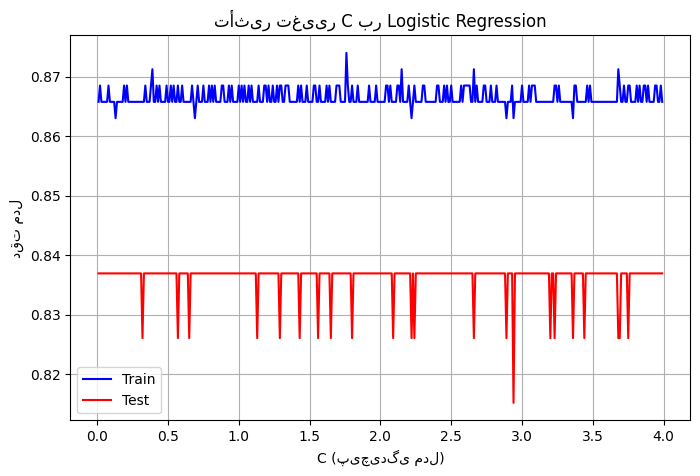

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train_score=[]
Test_score=[]

for c in np.arange(0.01, 4, 0.01):
    clf = LogisticRegression(C=c, max_iter=1000)
    clf.fit(X_train, y_train)
    Train_score.append(clf.score(X_train, y_train))
    Test_score.append(clf.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(np.arange(0.01,4,0.01), Train_score, 'b-', label='Train')
plt.plot(np.arange(0.01,4,0.01), Test_score, 'r-', label='Test')
plt.legend()
plt.xlabel("C (پیچیدگی مدل)")
plt.ylabel("دقت مدل")
plt.title("تأثیر تغییر C بر Logistic Regression")
plt.grid(True)
plt.show()


C=0.01 ✅  Train=0.775  Test=0.761
C=0.11 ✅  Train=0.852  Test=0.804
C=0.21 ✅  Train=0.844  Test=0.804
C=0.31 ✅  Train=0.844  Test=0.804
C=0.41 ✅  Train=0.847  Test=0.804
C=0.51 ✅  Train=0.849  Test=0.804
C=0.61 ✅  Train=0.849  Test=0.804
C=0.71 ✅  Train=0.849  Test=0.804
C=0.81 ✅  Train=0.849  Test=0.804
C=0.91 ✅  Train=0.847  Test=0.804
C=1.01 ✅  Train=0.849  Test=0.804
C=1.11 ✅  Train=0.852  Test=0.804
C=1.21 ✅  Train=0.852  Test=0.804
C=1.31 ✅  Train=0.852  Test=0.804
C=1.41 ✅  Train=0.852  Test=0.815
C=1.51 ✅  Train=0.852  Test=0.815
C=1.61 ✅  Train=0.852  Test=0.815
C=1.71 ✅  Train=0.855  Test=0.815
C=1.81 ✅  Train=0.858  Test=0.815
C=1.91 ✅  Train=0.858  Test=0.815
C=2.01 ✅  Train=0.863  Test=0.826
C=2.11 ✅  Train=0.863  Test=0.826
C=2.21 ✅  Train=0.863  Test=0.826
C=2.31 ✅  Train=0.868  Test=0.826
C=2.41 ✅  Train=0.868  Test=0.826
C=2.51 ✅  Train=0.868  Test=0.826
C=2.61 ✅  Train=0.868  Test=0.826
C=2.71 ✅  Train=0.868  Test=0.826
C=2.81 ✅  Train=0.868  Test=0.826
C=2.91 ✅  Trai

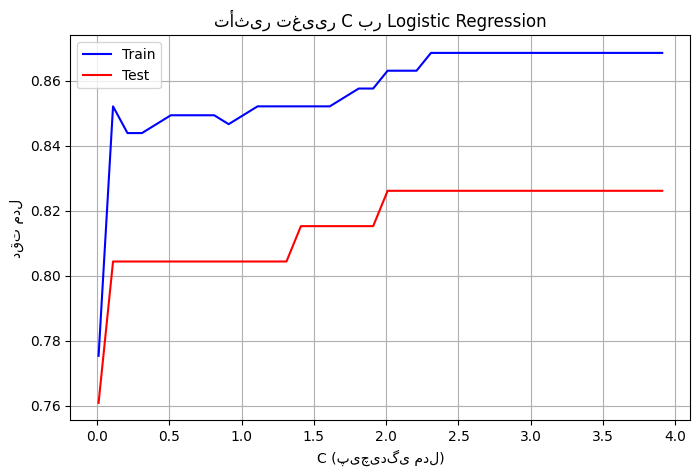

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# مقیاس‌دهی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train_score = []
Test_score = []

# حلقه با بررسی پیشرفت
for c in np.arange(0.01, 4, 0.1):
    clf = LogisticRegression(C=c, max_iter=5000)
    clf.fit(X_train, y_train)
    Train_score.append(clf.score(X_train, y_train))
    Test_score.append(clf.score(X_test, y_test))
    print(f"C={c:.2f} ✅  Train={Train_score[-1]:.3f}  Test={Test_score[-1]:.3f}")

# بررسی لیست‌ها
print("Train scores:", len(Train_score))
print("Test scores:", len(Test_score))

# رسم نمودار فقط اگه چیزی وجود داره
if len(Train_score) > 0:
    plt.figure(figsize=(8,5))
    plt.plot(np.arange(0.01,4,0.1), Train_score, 'b-', label='Train')
    plt.plot(np.arange(0.01,4,0.1), Test_score, 'r-', label='Test')
    plt.legend()
    plt.xlabel("C (پیچیدگی مدل)")
    plt.ylabel("دقت مدل")
    plt.title("تأثیر تغییر C بر Logistic Regression")
    plt.grid(True)
    plt.show()
else:
    print("❌ هیچ مقداری برای رسم وجود ندارد.")


In [ ]:
clf=LogisticRegression(C=0.5)
clf.fit(X_train, y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))